## Extracting Data

Easily extract tables from websites with pandas and python
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/OXA_ZD1gR6A/0.jpg)](https://www.youtube.com/watch?v=OXA_ZD1gR6A)
source: https://www.youtube.com/watch?v=OXA_ZD1gR6A<br>

Hint: Inspect source and click on desired table to identify table class

<img src="img/WebscarpingTableClass.png">

In [7]:
from pandas.io.html import read_html
import pandas as pd
#Extract tables of class:"table-style1"
page='https://www.mot.gov.sg/about-mot/transport-safety-investigation-bureau/aaib/investigation-report/'
tables=read_html(page, attrs={"class":"table-style1"})

print("Extracted {num} tables".format(num=len(tables)))



Extracted 2 tables


In [8]:
tables[0].head()

,Date,Classification,Aircraft,Description
0,05 Jun 2019,Incident,Boeing B737-400,Main landing gear torsion link damage during l...


In [9]:
tables[1].tail()

,Date,Classification,Aircraft,Description
67,13 Dec 2002,Accident,DC8-62,"Runway overrun (PDF, 325.68 KB)"
68,12 Dec 2002,Incident,Boeing B737-300,"Collision with maintenance jeep (PDF, 668.41 KB)"
69,24 Jul 2002,Incident,Boeing B747-200F,"In-flight engine fire incident (PDF, 2.32 MB)"
70,28 Feb 2002,Accident,Arrow Air DC8-62,"Taxiing into drain (PDF, 1.83 MB)"
71,19 Oct 2000,Accident,Beech Super King Air 300,"Landing Accident (PDF, 220.22 KB)"


## Data Processing

Merge and convert to datetime object

In [15]:
#Combine the two tables extracted
frames = [tables[0], tables[1]]
result = pd.concat(frames)
#Parse column Date to_datetime
result['Date']=pd.to_datetime(result['Date'])
result

## Plot Bar Chart

Source: https://codeburst.io/plotting-with-pandas-dates-and-bar-plots-227f25351274

In [36]:
result['year'] = pd.DatetimeIndex(result['Date']).year
result_grouped = (result.groupby(['year'])
                .size()
                .reset_index(name="n_incident"))
result_grouped.head()


,year,n_incident
0,2000,1
1,2002,4
2,2003,1
3,2004,2
4,2005,2


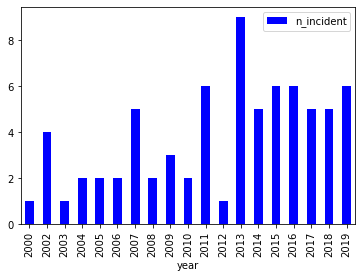

In [34]:
result_grouped.plot.bar(x="year", y="n_incident", color='blue');

## Plot Pie Chart

Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [38]:
result_grouped2 = (result.groupby(['Classification'])
                .size()
                .reset_index(name="Frequency"))
result_grouped2.set_index('Classification')
result_grouped2.index=result_grouped2 ['Classification']
result_grouped2

,Classification,Frequency
Classification,,
Accident,Accident,15
Incident,Incident,58


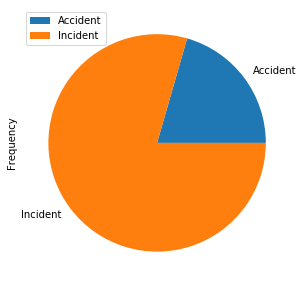

In [39]:
#result_grouped2.plot.bar(x="year", y="n_incident", color='blue');
plot = result_grouped2.plot.pie(y='Frequency', x='Classification',figsize=(5, 5))

<code>
Python
str = "This is a block level code"
print(str)
</code>

```Python
str = "This is block level code"
print(str)
```